In [1]:
#!pip install Keras
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import models 
import keras
from scipy.signal import blackman
from ast import literal_eval
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time

In [2]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
!pip install import-ipynb
import import_ipynb

In [4]:
from create_model import CreateModel

importing Jupyter notebook from create_model.ipynb


# Vector representation of v2 

# LSTM model

# Louvian algorithm

## Dataset

In [5]:
url = 'data/'
url_image='image_data/'

In [6]:
# # Reading a csv file named df_nodes_louvian
df_data = pd.read_csv(url+'df_nodes_louvian.csv', converters={'tf-idf': eval, 'tf-idf_after_norm':eval,'wordvec':eval}) 
df_data.shape

(514, 7)

In [7]:
df_data.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  louvain  
0             109.704459        0  
1             107.480757       19  
2             104.355574        2  
3              90.295322        2  
4              94.068587       19

In [8]:
df_data['louvain'].value_counts()

19    205
2     191
0      62
14      1
26      1
25      1
24      1
23      1
22      1
21      1
20      1
18      1
17      1
16      1
15      1
13      1
28      1
12      1
11      1
10      1
9       1
8       1
7       1
6       1
5       1
4       1
3       1
1       1
27      1
58      1
57      1
44      1
56      1
55      1
54      1
53      1
52      1
51      1
50      1
49      1
48      1
47      1
46      1
45      1
43      1
30      1
42      1
41      1
40      1
39      1
38      1
37      1
36      1
35      1
34      1
33      1
32      1
31      1
29      1
Name: louvain, dtype: int64

In [9]:
# Create object of class CreateModel
model_obj=CreateModel()

In [10]:
# Get 10 words with the highest text rank
word_list=model_obj.words_highest_text_rank(df_data)
word_list

['tel_aviv',
 'design',
 'works',
 'develop',
 'product',
 'engineer',
 'technologies',
 'skills',
 'look',
 'team',
 'company']

In [11]:
number_louvain = len(set(df_data.louvain))
print( 'Number of clusters for model input: ',number_louvain)

Number of clusters for model input:  59


In [12]:
# Calculate an average vector for each cluster
dict_data=model_obj.average_vectors(df_data,number_louvain, 'louvain')

In [13]:
# Rename column
df_vectors_clusters=pd.DataFrame.from_dict([dict_data]).T.rename(columns = {0: 'dataset_clasters'}, inplace = False)
df_vectors_clusters

dataset_clasters
cluster 0   [2.541625209020443, 3.216896717912421, 2.08222...
cluster 1   [0.0, 0.1876302551924636, 0.1738339128989001, ...
cluster 2   [6.483042754795587, 7.309414616173146, 7.09465...
cluster 3   [0.0, 0.0, 0.0, 0.0, 0.0, 0.14704490167180004,...
cluster 4   [0.0, 0.0, 0.0, 0.0301722908426855, 0.03017229...
cluster 5   [0.0, 0.0, 0.0, 0.0, 0.0, 0.12804573892335544,...
cluster 6   [0.0, 0.0, 0.0, 0.0, 0.13636135047747489, 0.12...
cluster 7   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06093996...
cluster 8   [0.0, 0.0, 0.13223792885972271, 0.160288398617...
cluster 9   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 10  [0.0, 0.0, 0.18222423664524995, 0.0, 0.1987900...
cluster 11  [0.21954343378019822, 0.0, 0.0, 0.0, 0.0, 0.0,...
cluster 12  [0.0, 0.16589794213831444, 0.0, 0.0, 0.0, 0.0,...
cluster 13  [0.13283312034534475, 0.0, 0.0, 0.0, 0.0, 0.0,...
cluster 14  [0.0, 0.0, 0.15782903448560692, 0.163674554281...
cluster 15  [0.0, 0.0, 0.011975710633812923, 0.01596761417...
cluster 16  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15801319...
cluster 17  [0.15841524624981, 0.0, 0.0, 0.0, 0.0, 0.0, 0....
cluster 18  [0.0, 0.0, 0.12626458808447966, 0.0, 0.0, 0.13...
cluster 19  [5.975717592733275, 6.2706081429617, 5.5545589...
cluster 20  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 21  [0.028046971433808222, 0.0, 0.0270452938826007...
cluster 22  [0.0, 0.0, 0.09701491762449667, 0.100608062721...
cluster 23  [0.05991211583624634, 0.10637457301537614, 0.0...
cluster 24  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.134...
cluster 25  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 26  [0.0935168390259551, 0.10242320464747466, 0.0,...
cluster 27  [0.06894391320130851, 0.07175795047483131, 0.0...
cluster 28  [0.16891075705929404, 0.1758050736739591, 0.18...
cluster 29  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 30  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1513681968166...
cluster 31  [0.0, 0.19045950161330477, 0.15940632200243984...
cluster 32  [0.04736738188970243, 0.0, 0.0, 0.0, 0.0, 0.04...
cluster 33  [0.0, 0.0, 0.1320296851972118, 0.0, 0.0, 0.0, ...
cluster 34  [0.0, 0.0, 0.0, 0.0, 0.19210050455767344, 0.18...
cluster 35  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 36  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.156...
cluster 37  [0.17856905026287986, 0.1858575829266709, 0.0,...
cluster 38  [0.0, 0.17111667884079376, 0.1585345701025001,...
cluster 39  [0.0, 0.17035514833367096, 0.15782903448560692...
cluster 40  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 41  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0632321804667...
cluster 42  [0.13861334046858373, 0.14427102783464837, 0.0...
cluster 43  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1893100457674...
cluster 44  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 45  [0.0, 0.10349985764629874, 0.0, 0.0, 0.1278527...
cluster 46  [0.1752462811361375, 0.18239919057026555, 0.16...
cluster 47  [0.0, 0.0, 0.0, 0.18027220596922974, 0.1802722...
cluster 48  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 49  [0.0, 0.0, 0.0, 0.16663346169182422, 0.1904382...
cluster 50  [0.0, 0.11057555076399331, 0.10244499556075852...
cluster 51  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 52  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
cluster 53  [0.13307450951246702, 0.13850612214562896, 0.1...
cluster 54  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17558981...
cluster 55  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1104925649949...
cluster 56  [0.12141629103497305, 0.1496022157395204, 0.12...
cluster 57  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.118...
cluster 58  [0.0, 0.0, 0.0, 0.0, 0.0, 0.14391200506658577,...

In [14]:
# Enter the dataset_clasters values into the dataset
dataset = np.array(df_vectors_clusters['dataset_clasters'].to_list())
dataset.shape

(59, 699)

In [15]:
# Choose a number of time steps
n_steps = 50
# Call to function flat_split_sequences_validation
X_train, y_train, X_test, y_test, X_valid, y_valid = model_obj.flat_split_sequences_validation(dataset, n_steps)

In [16]:
y_train_lenght, y_valid_lenght, y_test_lenght= model_obj.get_lenght(X_train, X_valid, y_test)

y_train lenght : 389 , y_valid lenght : 129 , y_test lenght : 131


In [17]:
# Convert into input/output- Call to function reshape_data
X_train, y_train, X_test, y_test, X_valid, y_valid=model_obj.reshape_data(X_train, y_train, X_test, y_test, X_valid, y_valid, n_steps)
n_features = X_train.shape[2]
n_features

1

In [18]:
# Get predictive input data
full_X_train, full_y_train, full_X_test, full_y_test, full_X_valid, full_y_valid=model_obj.get_data_predict( df_data, n_steps)

# log-cosh

In [79]:
name_model='model_LSTM_cluster/LogCosh_LSTM_louvian_cluster_model_v2'
name_history='history_LSTM_cluster/LogCosh_LSTM_louvian_cluster_v2_history'

In [80]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.LogCosh())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [81]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


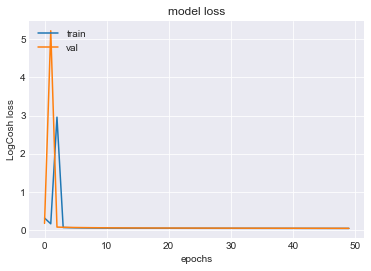

In [82]:
model_obj.model_loss(load_history,'LogCosh')

In [23]:
# Get a test and valid prediction for a logcosh loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [24]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 23s 11ms/step - loss: 0.0062


0.0062368507497012615

In [25]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  louvain  \
0             109.704459        0   
1             107.480757       19   
2             104.355574        2   
3              90.295322        2   
4              94.068587       19   

                                 validate_prediction  \
0  [[0.056009896], [0.05610516], [0.0561874], [0....   
1  [[0.056730565], [0.057409026], [0.057850398], ...   
2  [[0.051692925], [0.050749857], [0.049862083], ...   
3  [[0.055622622], [0.055673297], [0.05553422], [...   
4  [[0.04869552], [0.04811278], [0.04754541], [0....   

                                     test_prediction  
0  [[0.047920167], [0.047312345], [0.046745516], ...  
1  [[0.045174405], [0.046069715], [0.047500703], ...  
2  [[0.05216891], [0.051891807], [0.051495697], [...  
3  [[0.04555304], [0.04559292], [0.045874666], [0...  
4  [[0.057021573], [0.057017013], [0.0567666], [0...

### Visualization of words prediction - LogCosh loss

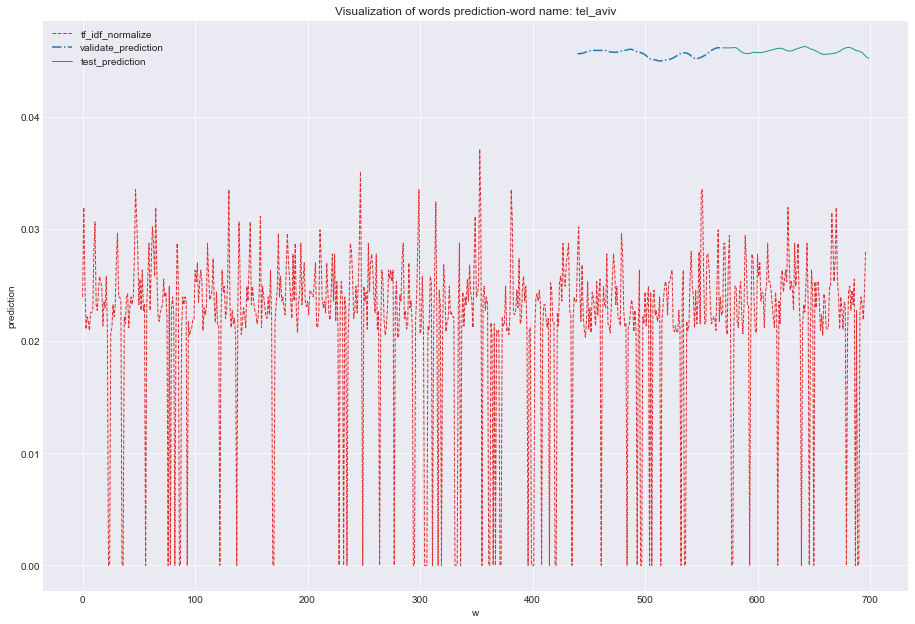

In [26]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

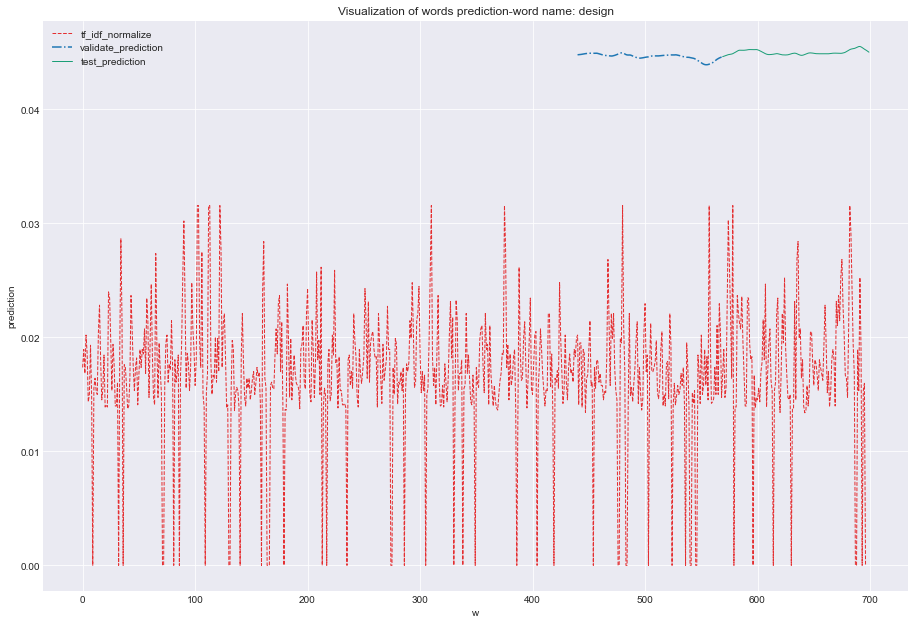

In [27]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

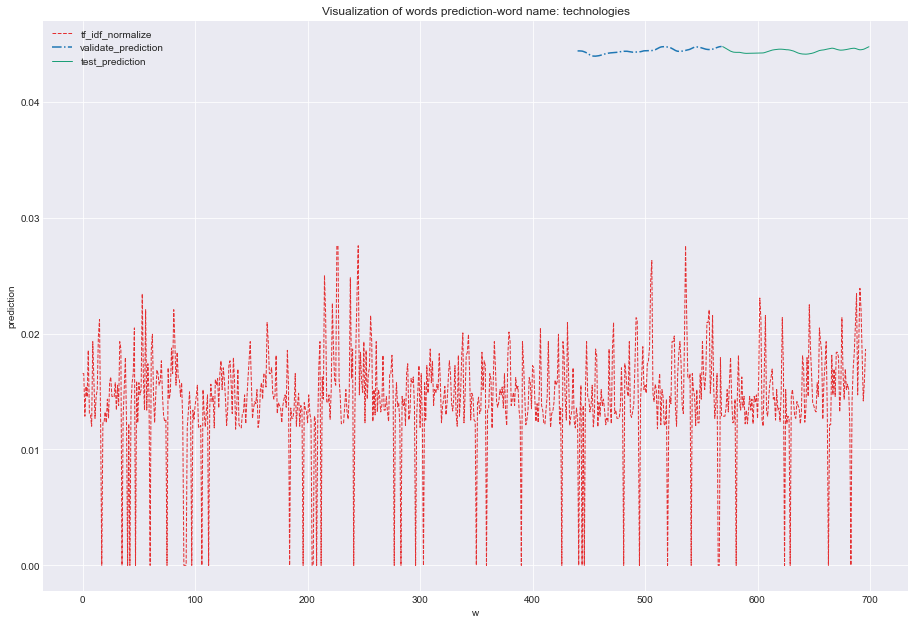

In [28]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

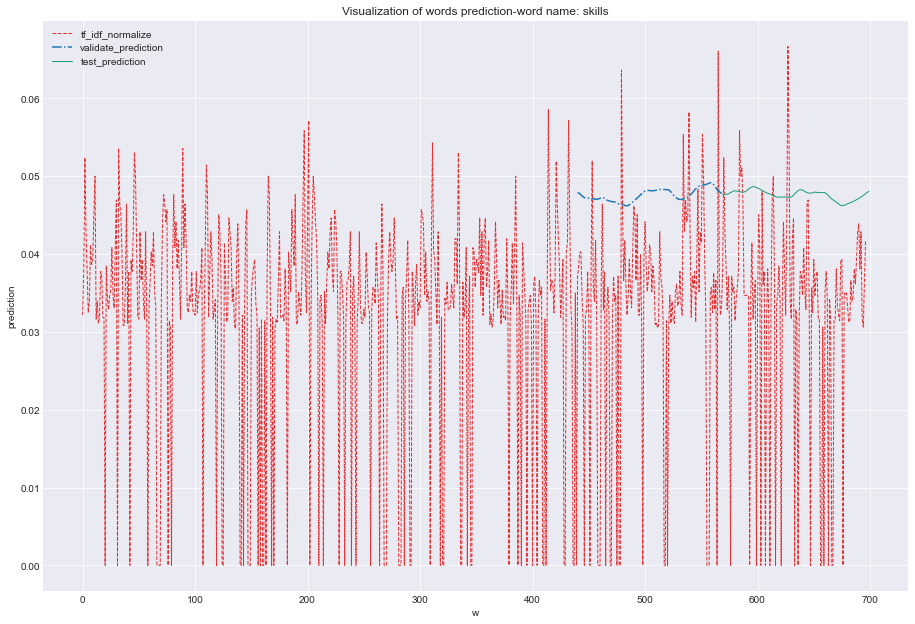

In [29]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

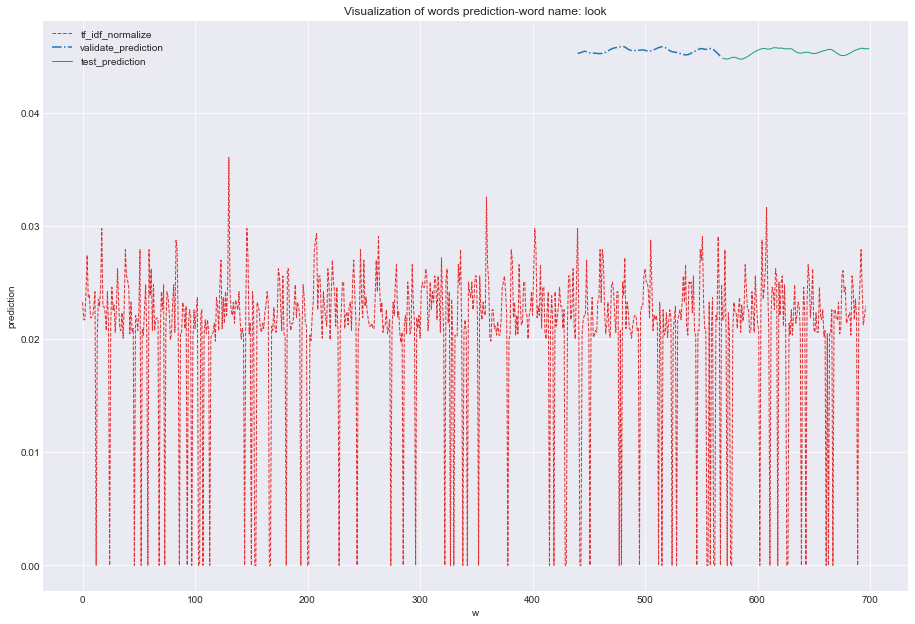

In [30]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

# Huber

In [31]:
name_model='model_LSTM_cluster/Huber_LSTM_louvian_cluster_model_v2'
name_history='history_LSTM_cluster/Huber_LSTM_louvian_cluster_v2_history'

In [32]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.Huber())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [33]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


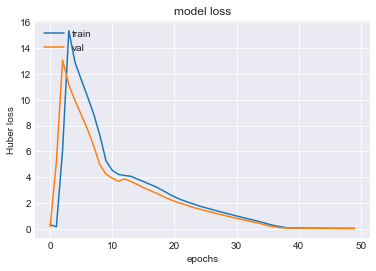

In [34]:
model_obj.model_loss(load_history,'Huber')

In [35]:
# Get a test and valid prediction for a Huber loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [36]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 30s 14ms/step - loss: 0.0063


0.00626340601593256

In [37]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  louvain  \
0             109.704459        0   
1             107.480757       19   
2             104.355574        2   
3              90.295322        2   
4              94.068587       19   

                                 validate_prediction  \
0  [[0.062796615], [0.06262089], [0.062473282], [...   
1  [[0.061542902], [0.06223425], [0.06266397], [0...   
2  [[0.055599213], [0.054318383], [0.053063933], ...   
3  [[0.06025352], [0.060273297], [0.06005754], [0...   
4  [[0.048826553], [0.048059214], [0.04729582], [...   

                                     test_prediction  
0  [[0.04802275], [0.047231916], [0.046460826], [...  
1  [[0.04099897], [0.042027462], [0.04370901], [0...  
2  [[0.05292264], [0.05267497], [0.05226491], [0....  
3  [[0.04409316], [0.043976776], [0.044152617], [...  
4  [[0.05896265], [0.05926138], [0.059237245], [0...

### Visualization of words prediction - Huber loss

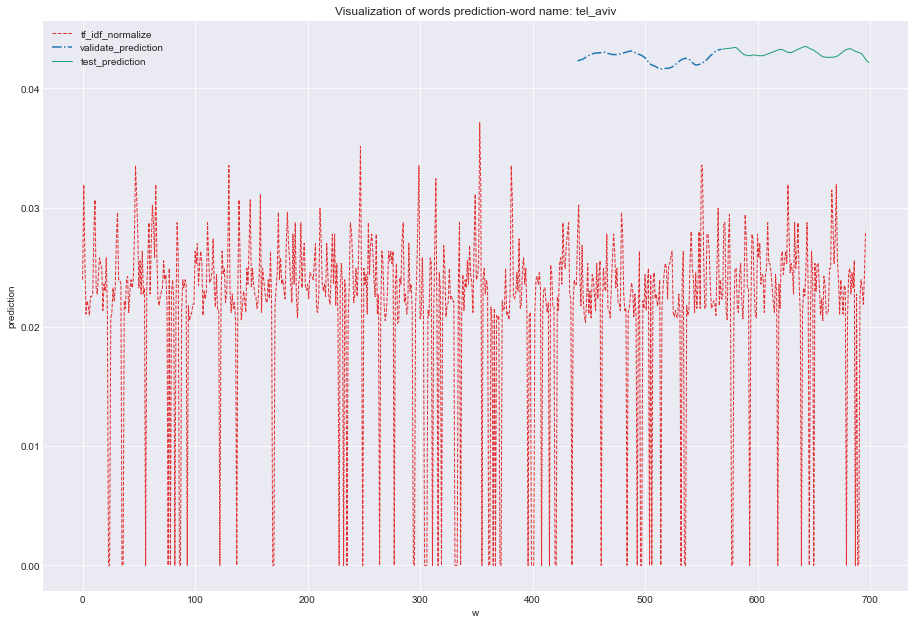

In [38]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

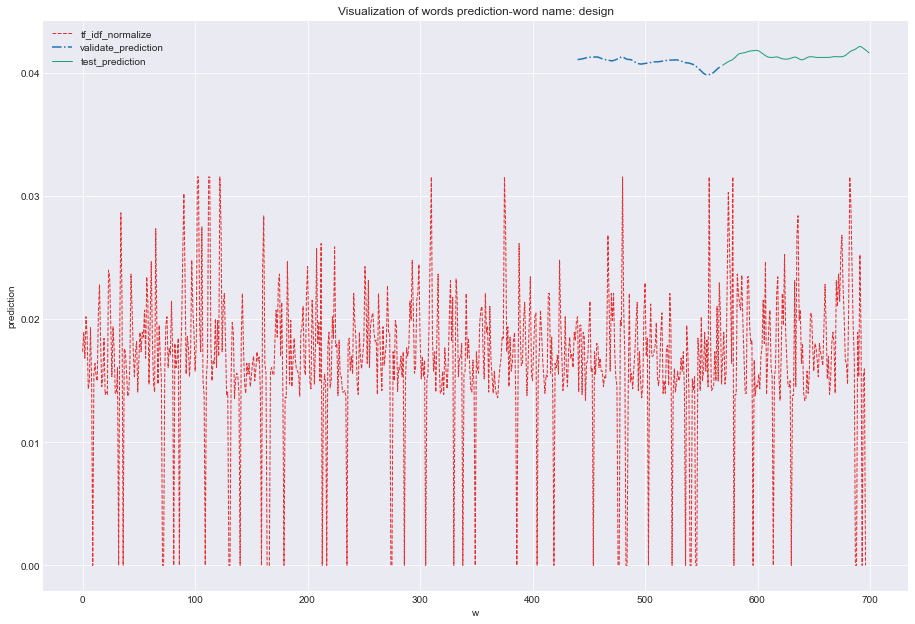

In [39]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

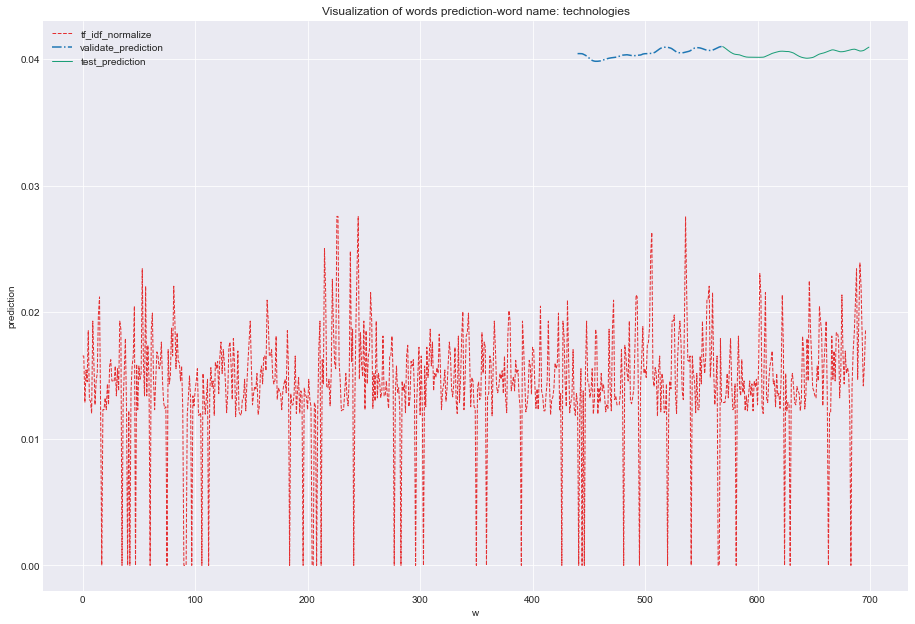

In [40]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

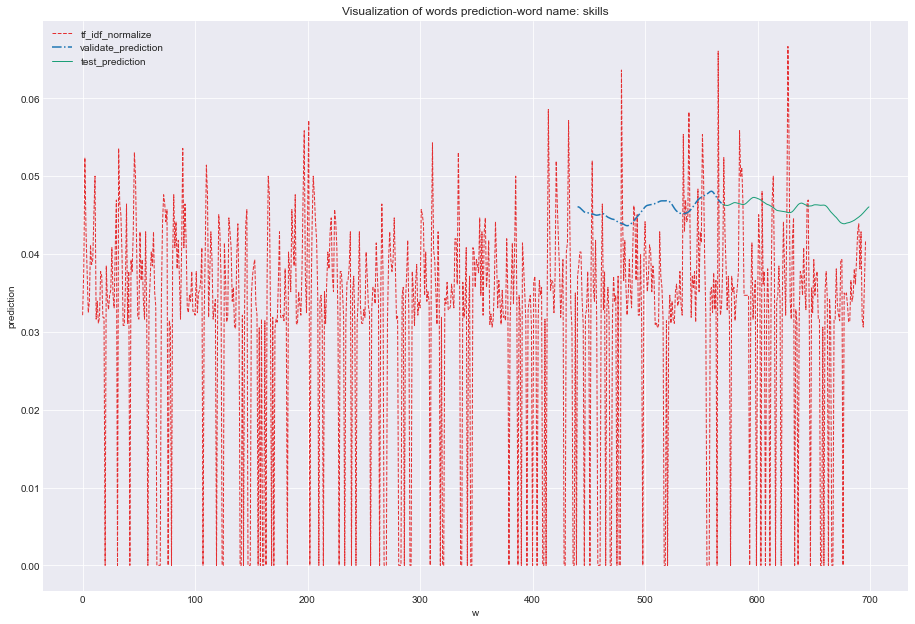

In [41]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

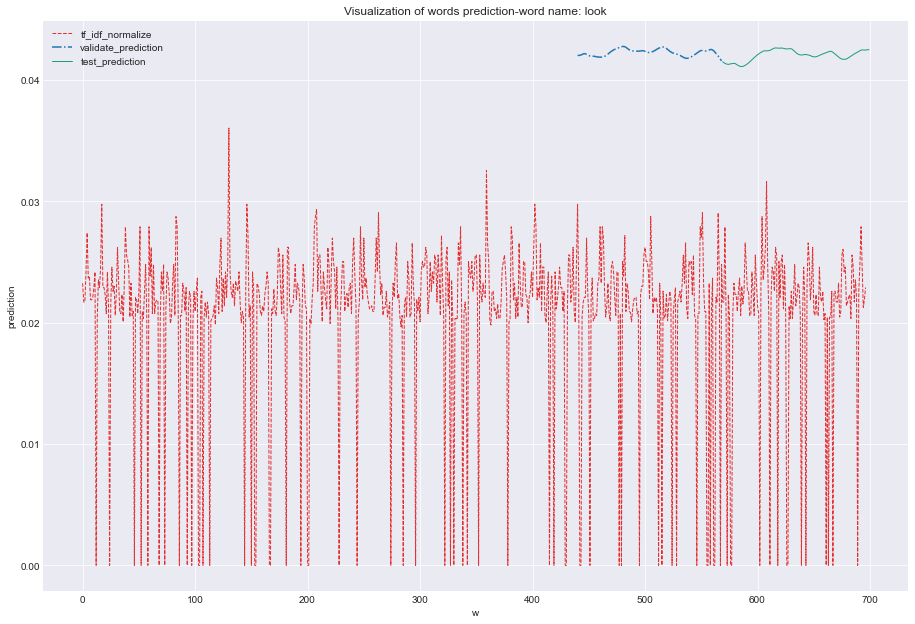

In [42]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## Logarithmic

In [43]:
name_model='model_LSTM_cluster/Logarithmic_LSTM_louvian_cluster_model_v2'
name_history='history_LSTM_cluster/Logarithmic_LSTM_louvian_cluster_v2_history'

In [44]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps,tf.keras.losses.MeanSquaredLogarithmicError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [45]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


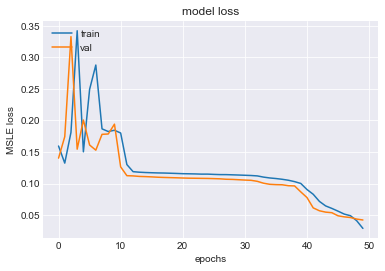

In [46]:
model_obj.model_loss(load_history,'MSLE')

In [47]:
# Get a test and valid prediction for a MSLE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [48]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 23s 11ms/step - loss: 0.0098


0.00980635266751051

In [49]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  louvain  \
0             109.704459        0   
1             107.480757       19   
2             104.355574        2   
3              90.295322        2   
4              94.068587       19   

                                 validate_prediction  \
0  [[0.046866845], [0.047218885], [0.047460973], ...   
1  [[0.04859244], [0.04977869], [0.05044109], [0....   
2  [[0.038637478], [0.037063107], [0.035592124], ...   
3  [[0.046263568], [0.04632392], [0.046010282], [...   
4  [[0.033797532], [0.03279634], [0.031830765], [...   

                                     test_prediction  
0  [[0.032282524], [0.031268686], [0.030330747], ...  
1  [[0.028318867], [0.030033581], [0.032738872], ...  
2  [[0.03997035], [0.039399933], [0.038637143], [...  
3  [[0.028410807], [0.028664015], [0.029341273], ...  
4  [[0.04853753], [0.048375748], [0.04778667], [0...

### Visualization of words prediction - MSLE loss

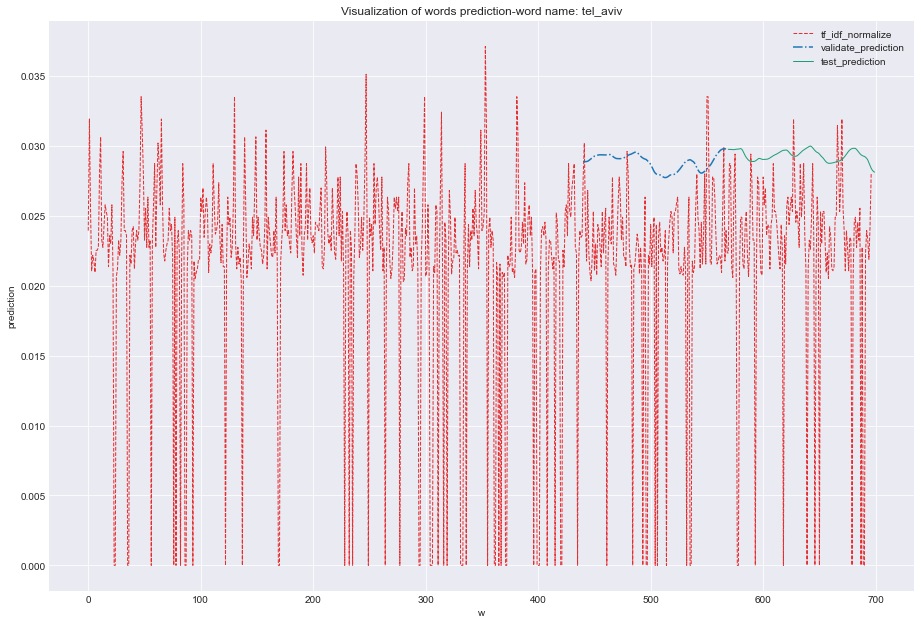

In [50]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

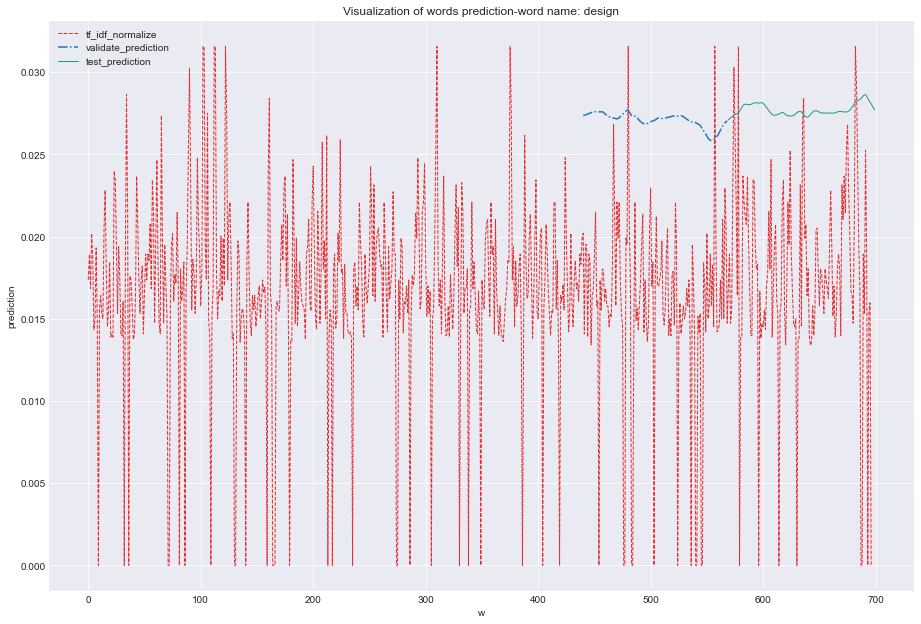

In [51]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

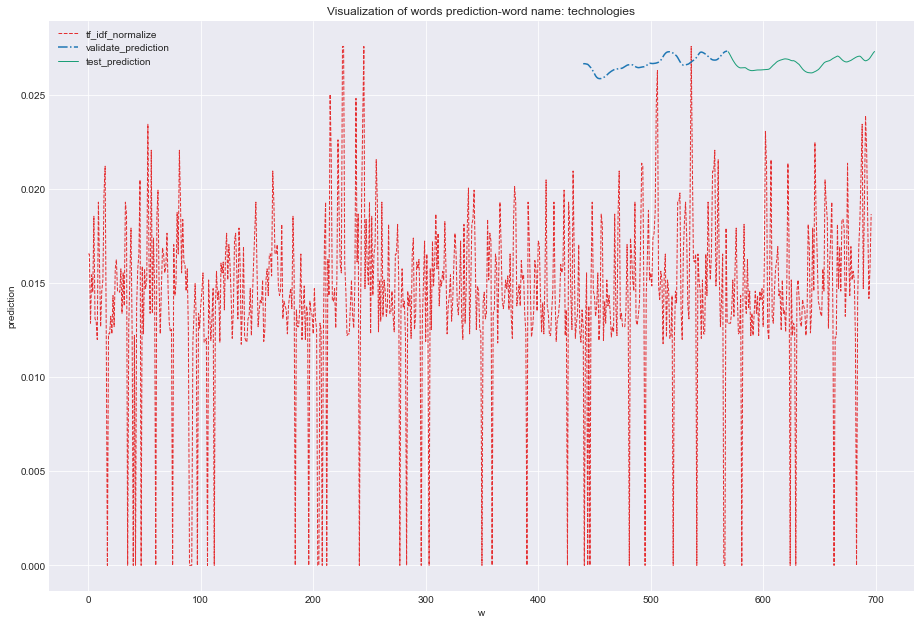

In [52]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

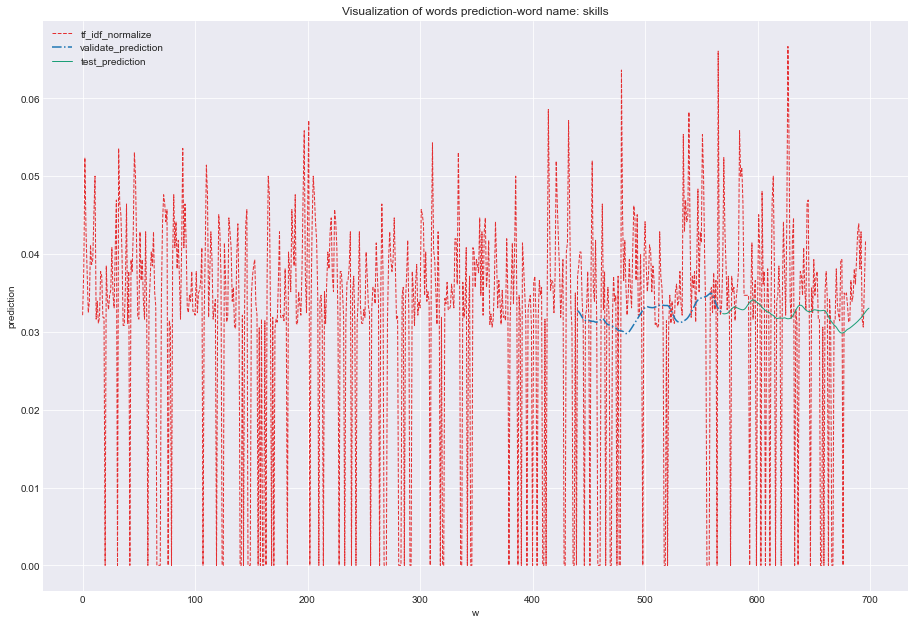

In [53]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

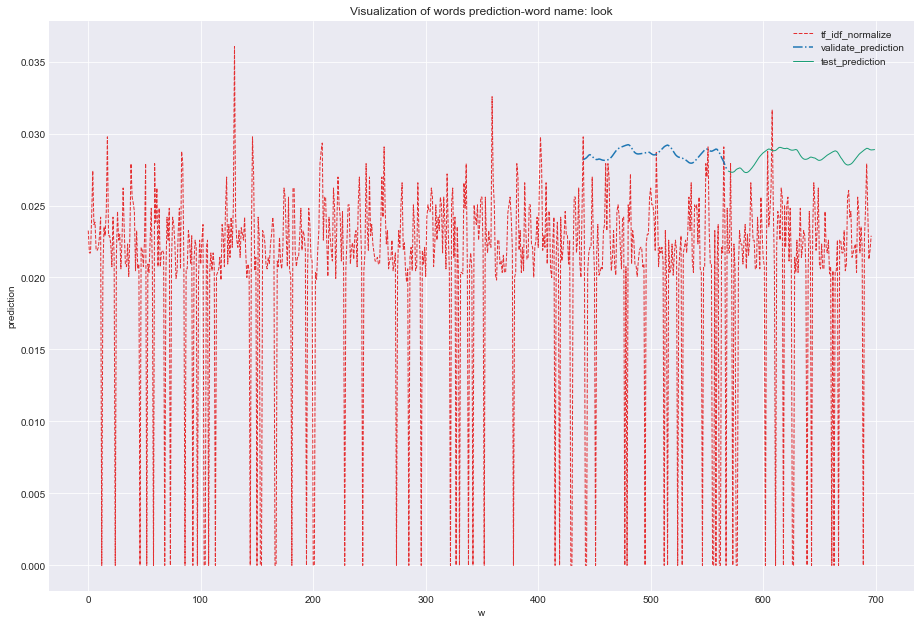

In [54]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MAE

In [55]:
name_model='model_LSTM_cluster/MAE_LSTM_louvian_cluster_model_v2'
name_history='history_LSTM_cluster/MAE_LSTM_louvian_cluster_v2_history'

In [56]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps,tf.keras.losses.MeanAbsoluteError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [57]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


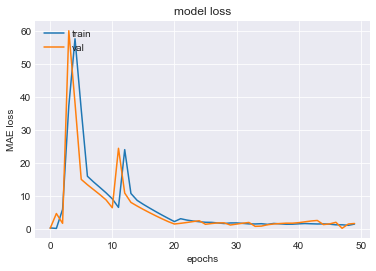

In [58]:
model_obj.model_loss(load_history,'MAE')

In [59]:
# Get a test and valid prediction for a MAE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [60]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 23s 10ms/step - loss: 0.0732


0.07322526723146439

In [61]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  louvain  \
0             109.704459        0   
1             107.480757       19   
2             104.355574        2   
3              90.295322        2   
4              94.068587       19   

                                 validate_prediction  \
0  [[0.02411149], [0.024145078], [0.024230402], [...   
1  [[0.024013292], [0.025438774], [0.02641755], [...   
2  [[0.012989849], [0.010892045], [0.0089064725],...   
3  [[0.021328423], [0.021578368], [0.021427508], ...   
4  [[0.005100891], [0.0037754066], [0.0024776831]...   

                                     test_prediction  
0  [[0.0030240417], [0.001681678], [0.0004273653]...  
1  [[-0.004673891], [-0.00288881], [2.1722168e-05...  
2  [[0.012005907], [0.01155784], [0.010815207], [...  
3  [[-0.0024897642], [-0.0025654621], [-0.0021195...  
4  [[0.022542577], [0.0228257], [0.022537421], [0...

### Visualization of words prediction - MAE loss

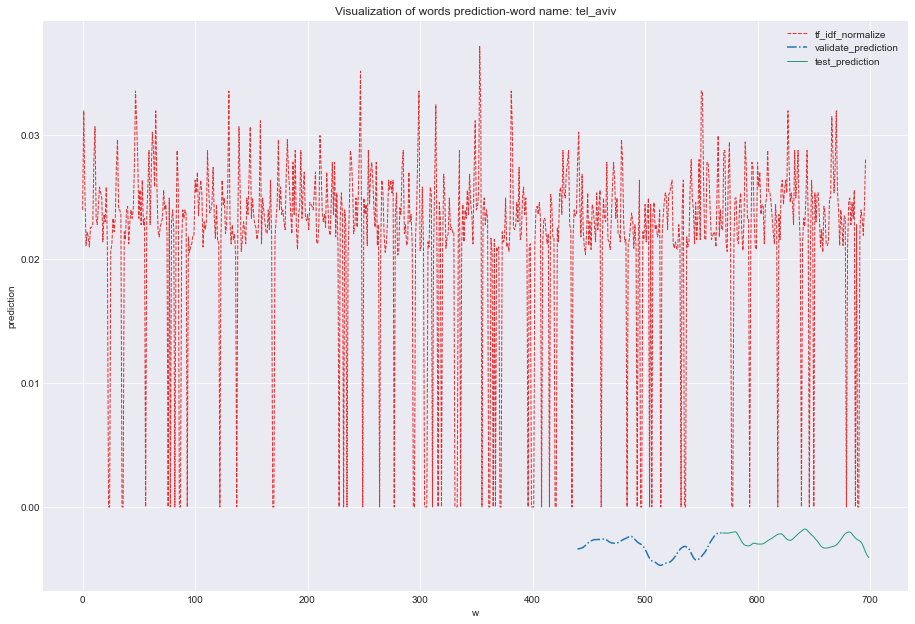

In [62]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

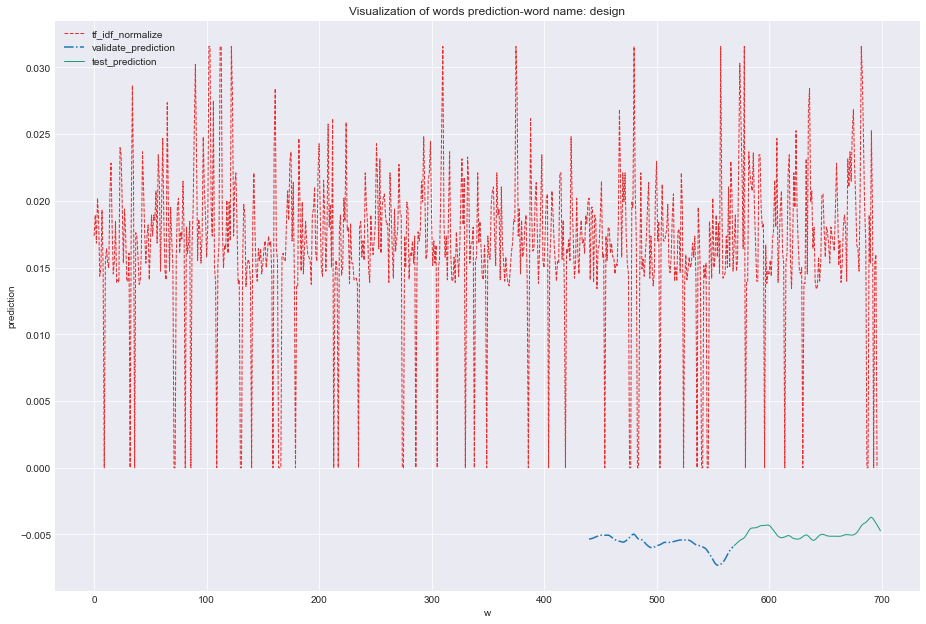

In [63]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

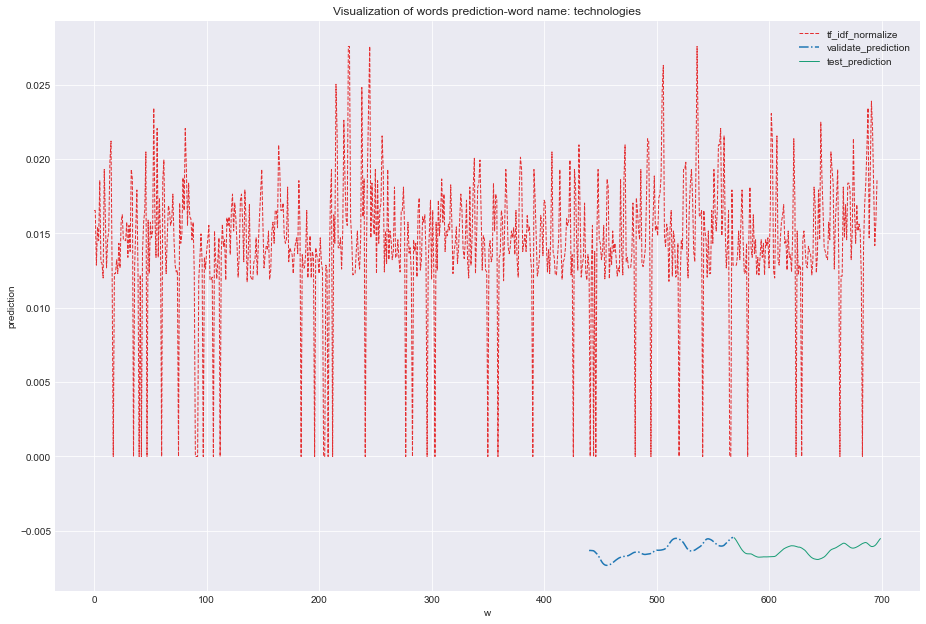

In [64]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

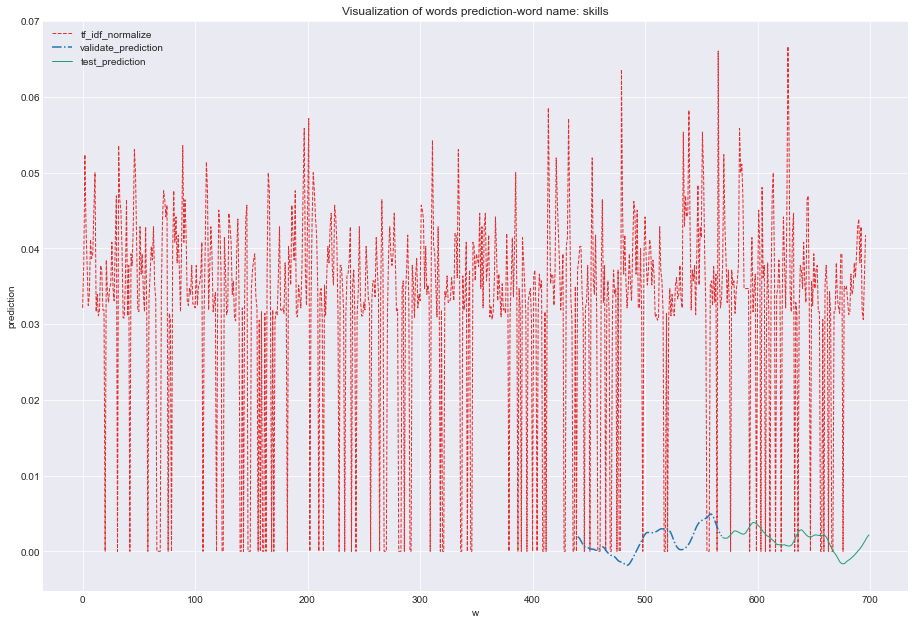

In [65]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

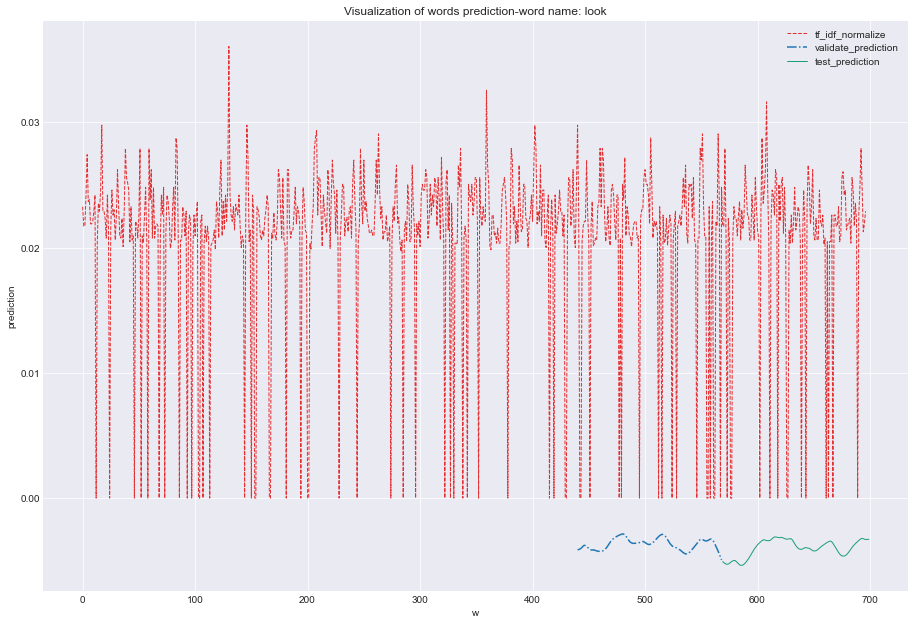

In [66]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MSE

In [67]:
name_model='model_LSTM_cluster/MSE_LSTM_louvian_cluster_model_v2'
name_history='history_LSTM_cluster/MSE_LSTM_louvian_cluster_v2_history'

In [68]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_LSTM(n_features,n_steps, tf.keras.losses.MeanSquaredError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [69]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________


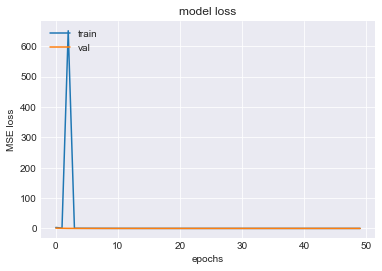

In [70]:
model_obj.model_loss(load_history,'MSE')

In [71]:
# Get a test and valid prediction for a MSE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [72]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

2105/2105 [==============================] - 21s 10ms/step - loss: 0.0125


0.012518040835857391

In [73]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0    modern  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00155619...   
1      saas  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      used  [0.0, 0.0, 0.0, 0.0015521196808122063, 0.00177...   
3     among  [0.0018083251886995833, 0.0, 0.0, 0.0, 0.0, 0....   
4  enabling  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29355458...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.32159919786428914, 0.3215991...   
3  [0.3822799448910919, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                             wordvec  word_rank  \
0  [-0.24942, -0.73219, 0.17863, -0.29171, 1.0194...        283   
1  [0.021683, 0.28122, -0.87629, -0.2346, -0.0122...        300   
2  [0.47751, 0.13662, 0.47026, -0.34915, -0.05846...        331   
3  [0.68472, -0.08644, -0.11884, -0.1911, 0.24869...        460   
4  [-0.86696, -0.019402, -0.89041, 0.31414, 0.299...        426   

   sum_cosine_similarity  louvain  \
0             109.704459        0   
1             107.480757       19   
2             104.355574        2   
3              90.295322        2   
4              94.068587       19   

                                 validate_prediction  \
0  [[0.07806342], [0.077836305], [0.077746406], [...   
1  [[0.077726826], [0.07847636], [0.07914952], [0...   
2  [[0.073142014], [0.07177703], [0.07047087], [0...   
3  [[0.0766739], [0.0767883], [0.076762795], [0.0...   
4  [[0.06827275], [0.067497246], [0.06671614], [0...   

                                     test_prediction  
0  [[0.06743242], [0.06653646], [0.06568814], [0....  
1  [[0.062090874], [0.06296445], [0.06436549], [0...  
2  [[0.07214806], [0.07199703], [0.071667574], [0...  
3  [[0.06381464], [0.06353517], [0.06354013], [0....  
4  [[0.078209646], [0.0785405], [0.07856126], [0....

### Visualization of words prediction - MSE loss

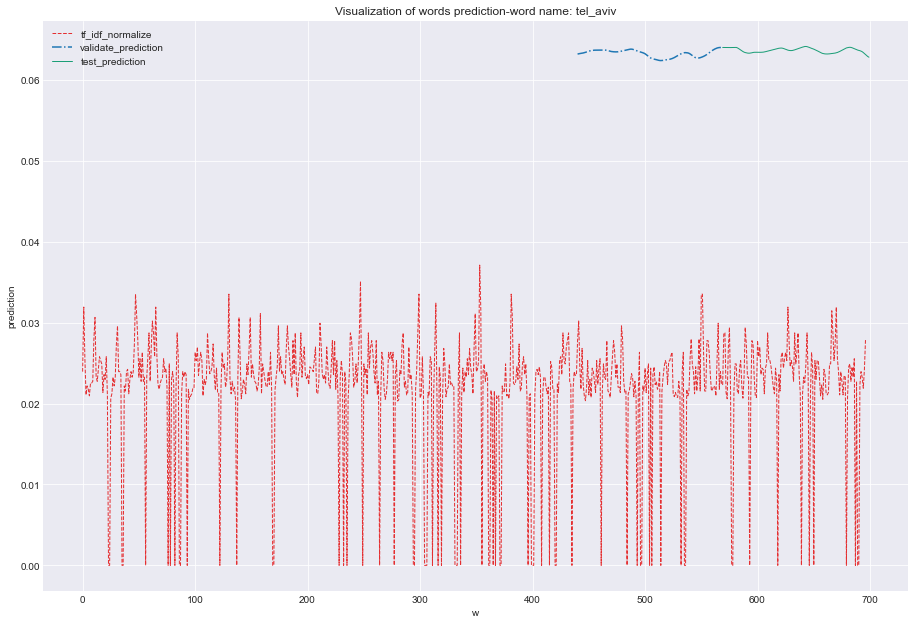

In [74]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

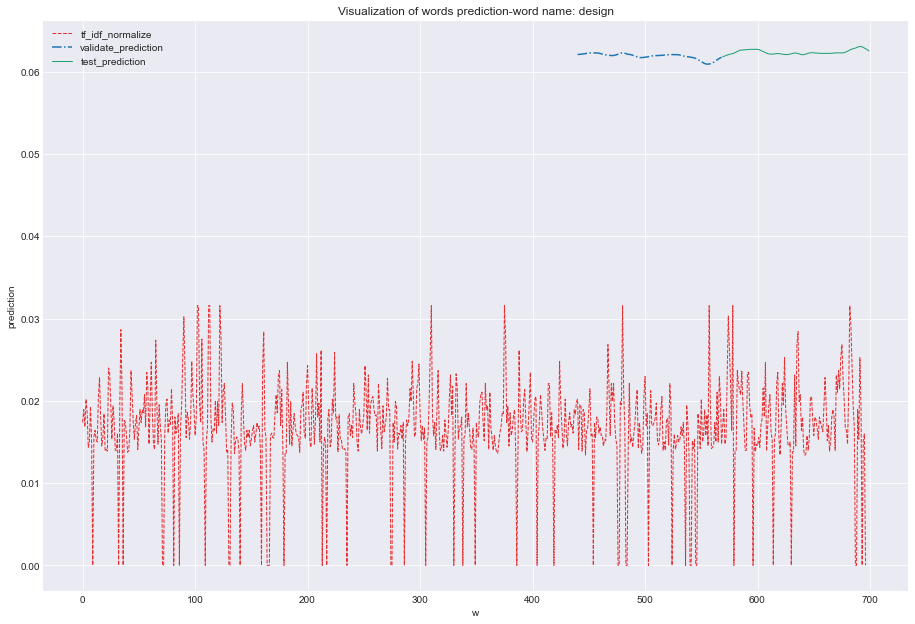

In [75]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

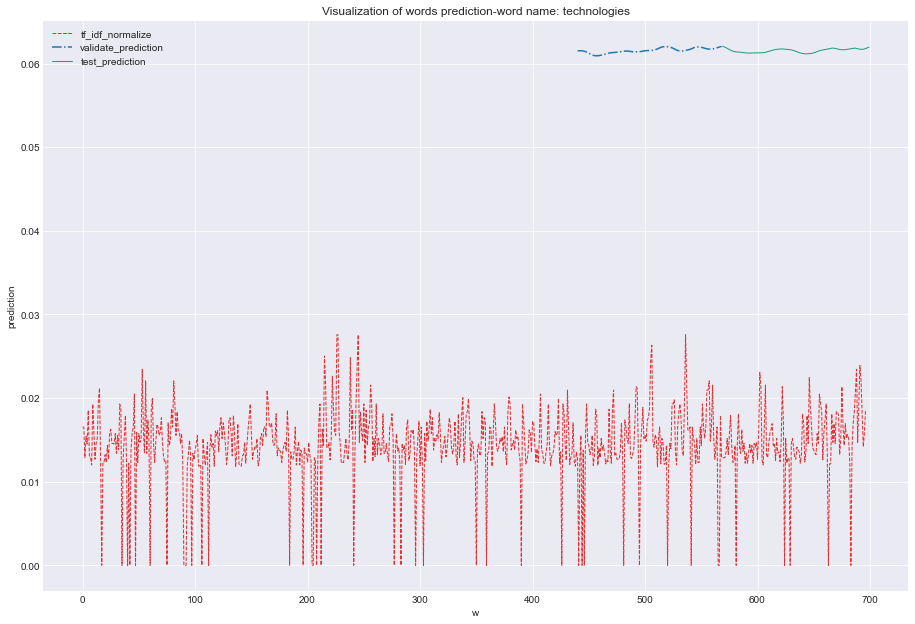

In [76]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

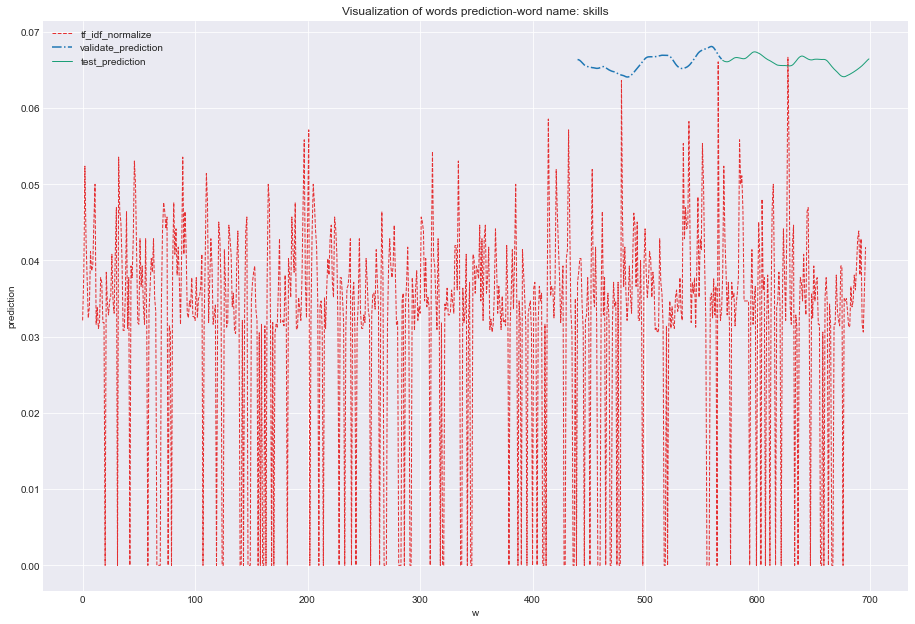

In [77]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

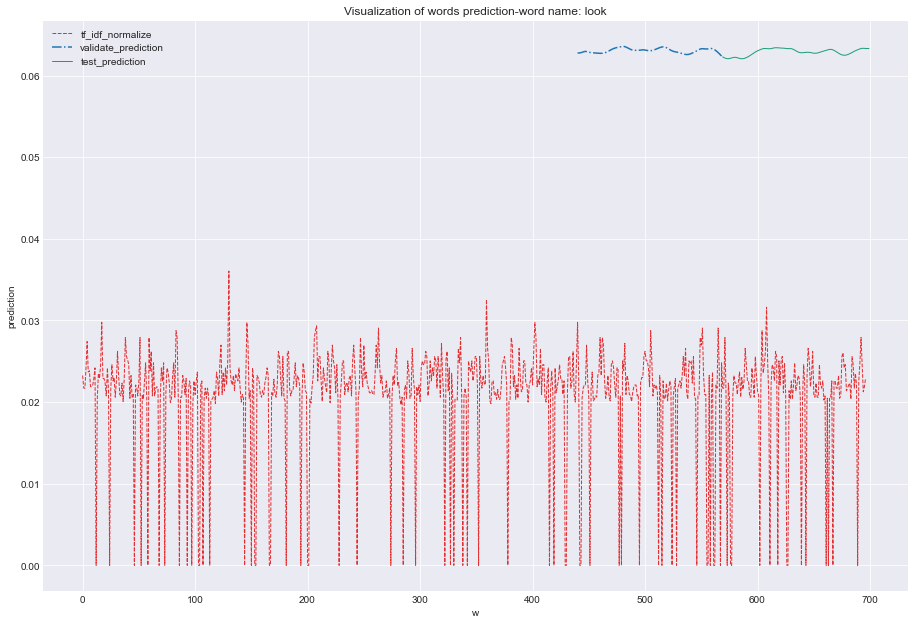

In [78]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)